In [1]:
import networkx as nx
from networkx.algorithms import bipartite
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (30, 20)

# Read and preview data

In [2]:
v0 = pd.read_csv('users.csv')
v1 = pd.read_csv('movies.csv')
e = pd.read_csv('ratings.csv')

In [3]:
v0.head()

,UserID,Sex,Age,Occupation,Zipcode
0,U1,F,1,10,48067
1,U2,M,56,16,70072
2,U3,M,25,15,55117
3,U4,M,45,7,02460
4,U5,M,25,20,55455


In [4]:
v1.head()

,MovieID,Movie,Genre
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [5]:
e.head()

,UserID,MovieID,Rating,Timestamp,Movie
0,U1,1193,5,978300760,One Flew Over the Cuckoo's Nest (1975)
1,U1,661,3,978302109,James and the Giant Peach (1996)
2,U1,914,3,978301968,My Fair Lady (1964)
3,U1,3408,4,978300275,Erin Brockovich (2000)
4,U1,2355,5,978824291,"Bug's Life, A (1998)"


# Build network 

In [6]:
B = nx.Graph()

In [7]:
users = v0['UserID']
B.add_nodes_from(users,bipartite=0)

In [8]:
movies = v1['MovieID']
B.add_nodes_from(movies,bipartite=1)

In [9]:
ratings = [zip(e['UserID'], e['MovieID'], e['Rating'])]
for edge in ratings:
        B.add_weighted_edges_from(edge)

In [10]:
nx.is_connected(B)

False

# Remove nodes with no connections

In [11]:
remove = [node for node,degree in B.degree().items() if degree < 1]
B.remove_nodes_from(remove)

In [12]:
nx.is_connected(B)

True

In [13]:
top_nodes, bottom_nodes = bipartite.sets(B)

# Island Method Analysis

In [14]:
cc = list(nx.connected_component_subgraphs(B))[0]

In [15]:
cc.number_of_edges()

1000209

In [16]:
def trim_edges(g,weight=1):
    g2 = nx.Graph()
    for f, to, edata in g.edges(data=True):
        if edata['weight'] > weight:
            g2.add_edge(f,to,edata)
    return g2    

In [17]:
def island_method(g, iterations=4):
    weights= [edata['weight'] for f,to,edata in g.edges(data=True)]
    mn=int(min(weights))
    mx=int(max(weights))
    step=int((mx-mn)/iterations)
    return [[threshold, trim_edges(g,threshold)] for threshold in range(mn,mx,step)]

In [18]:
islands = island_method(cc)

In [19]:
for i in islands:
    print i[0], len(i[1]),len(list(nx.connected_component_subgraphs(i[1])))

1 9715 1
2 9667 1
3 9571 1
4 9246 2


# Graph full network

In [20]:
B.number_of_edges()

1000209

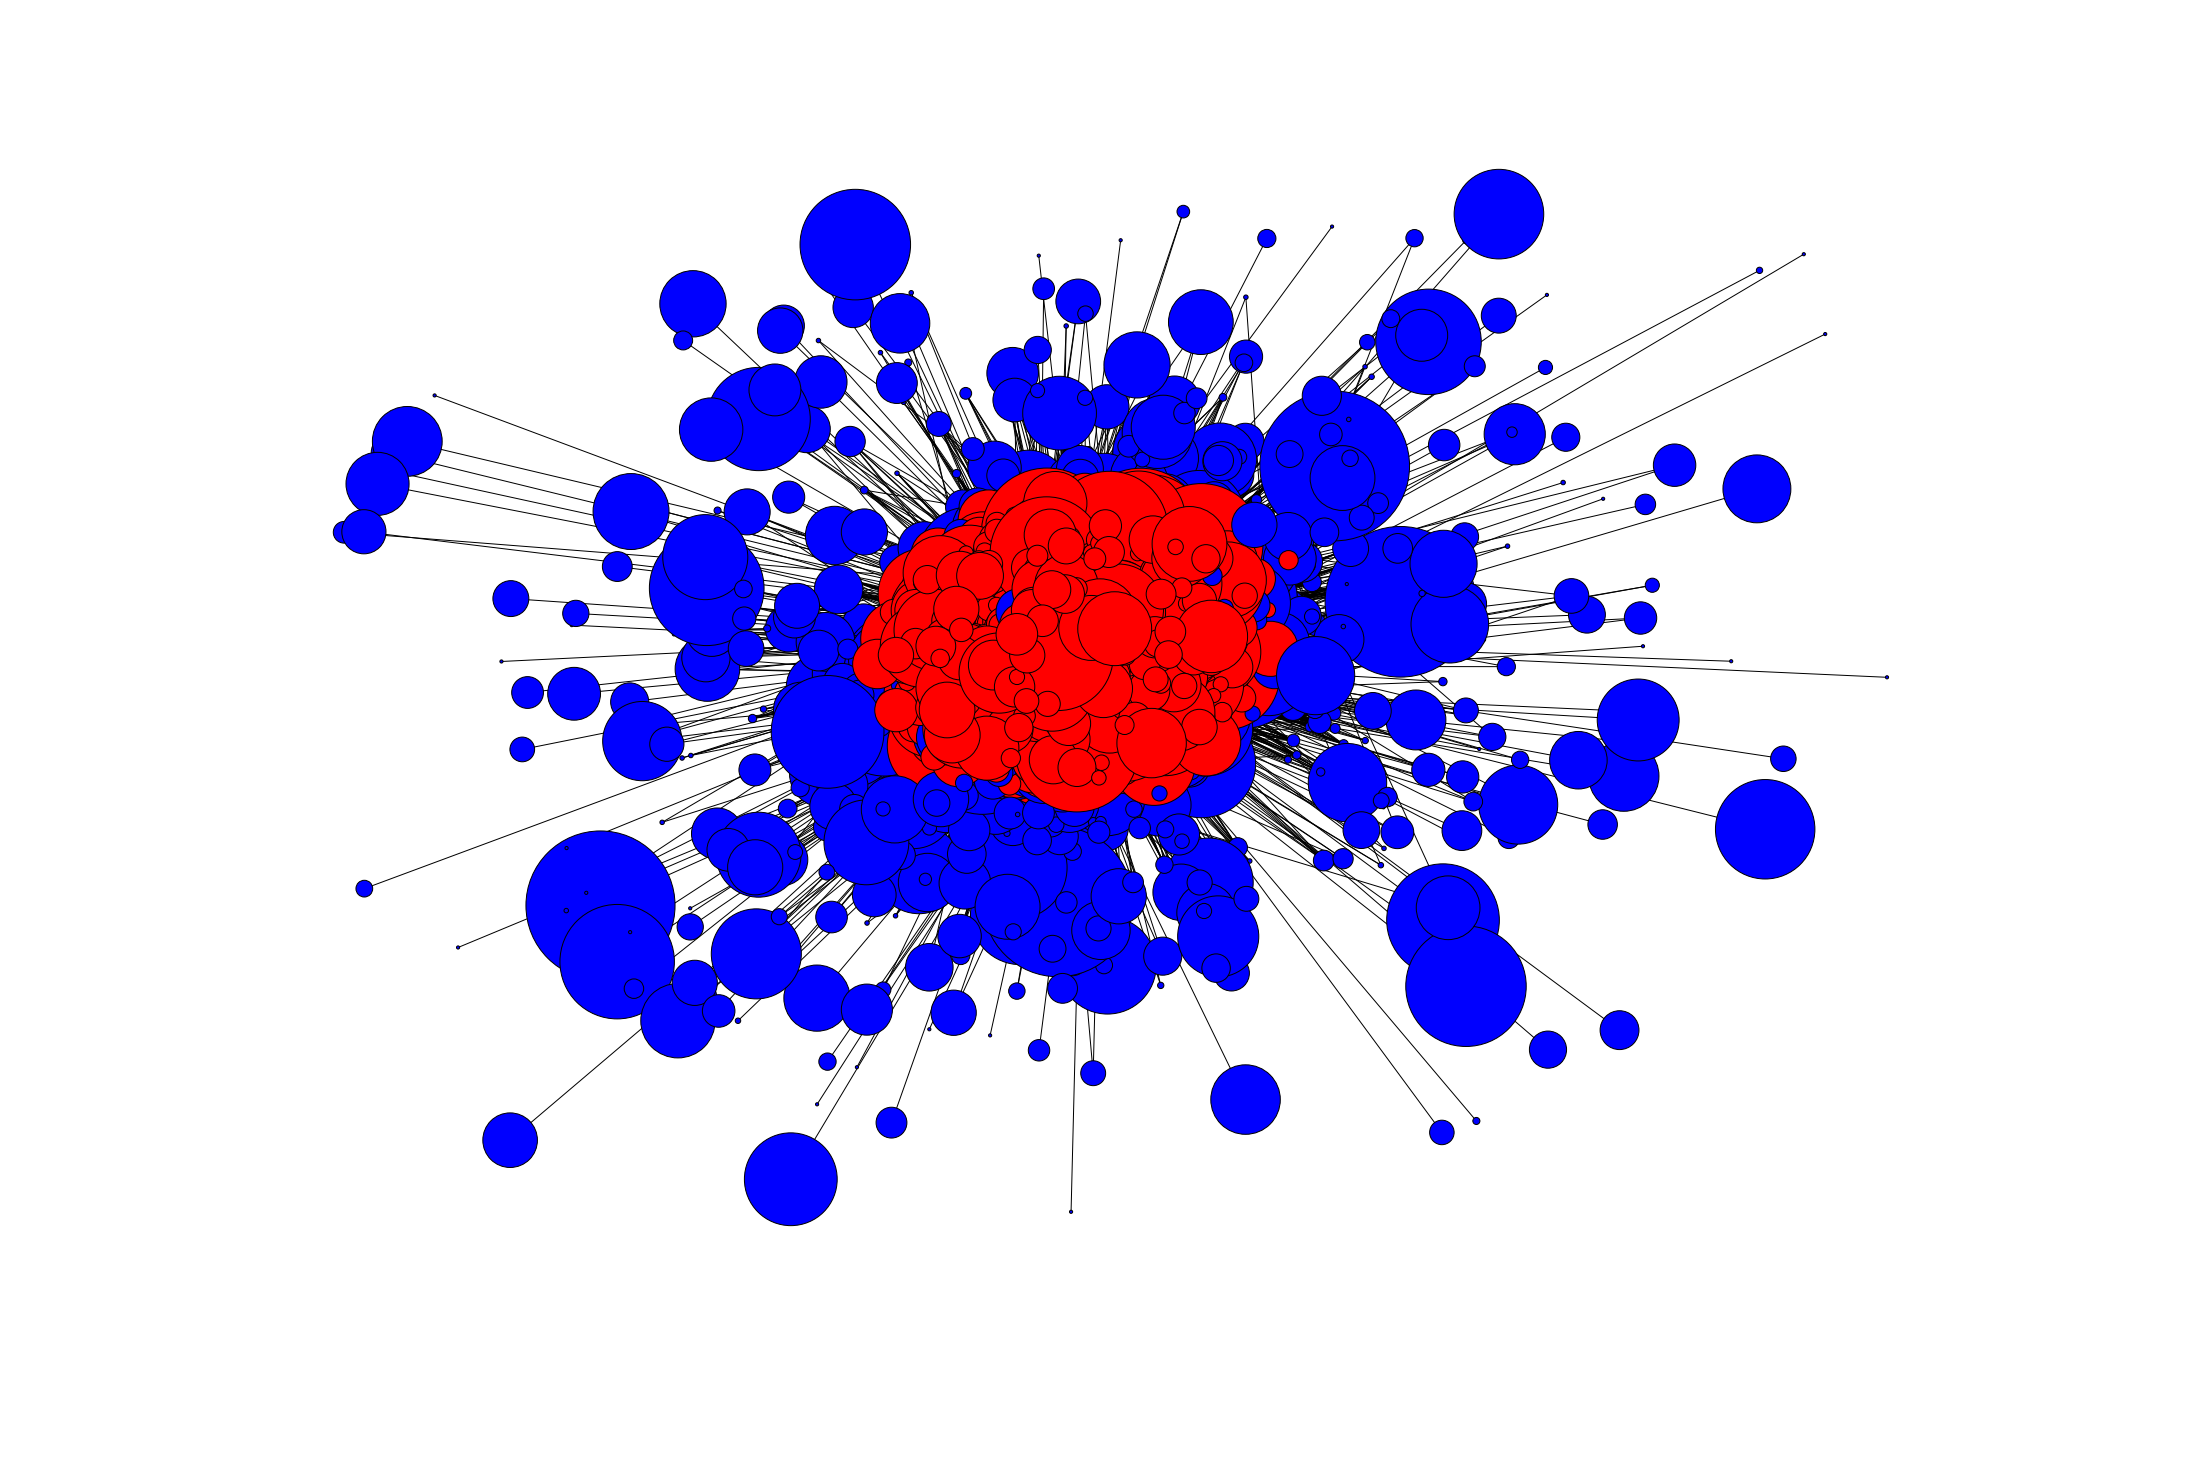

In [21]:
color = []
for n,d in B.nodes(data=True):
    if d['bipartite']==0:
        color.append('r')
    else:
        color.append('b')
        
d = B.degree()
nx.draw(B, node_size=[v*10 for v in d.values()], node_color=color)
plt.show()

# Trim edges and graph reduced network  

In [22]:
pc = trim_edges(cc, 4)
pc.number_of_edges()

226310

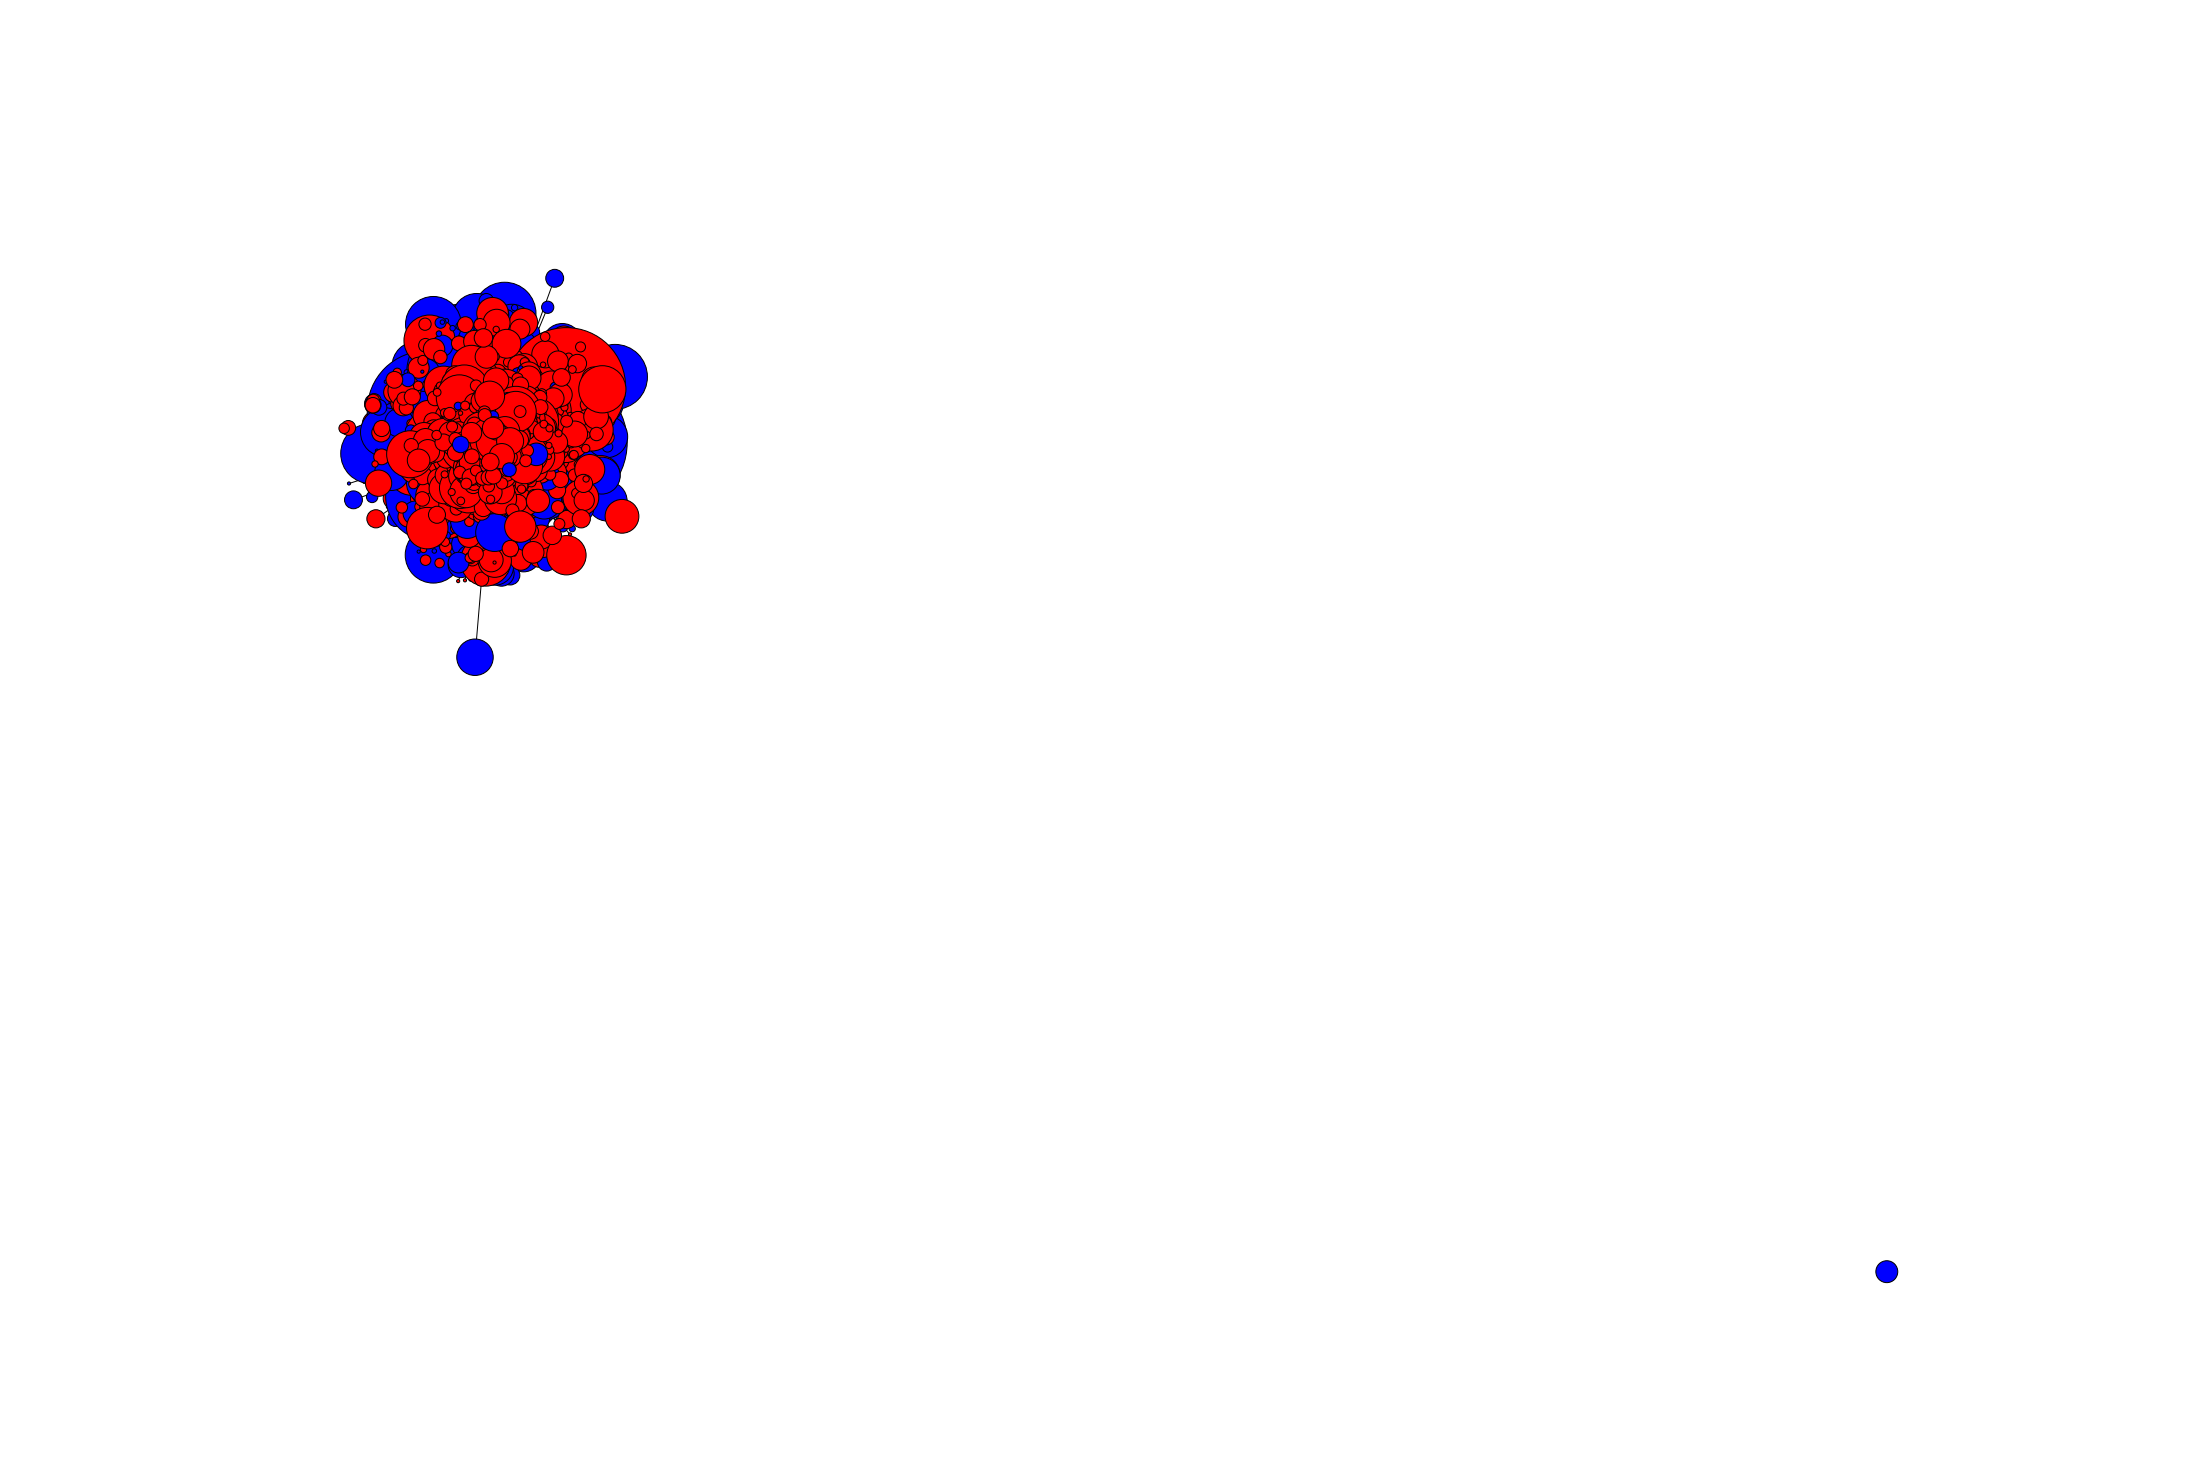

In [23]:
dpc = pc.degree()
nx.draw(pc, node_size=[v*10 for v in dpc.values()], node_color=color)